In [64]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
#Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [25]:
## Absenteeism Dataset

input_file = "~/Documents/Harrisburg University/ANLY - 530/Project/Absenteeism_at_work_test.csv"

df_test = pd.read_csv(input_file)


In [3]:
# # Credit Dataset

# input_file = "/Users/jujubibaba/Documents/Harrisburg University/ANLY - 530/Lab 1/credit.csv"
# df = pd.read_csv(input_file)
# target = df['Creditability']
# y = target
# X = df.drop(['Creditability'], axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 52)

In [4]:
# Wine Dataset

# input_file = "/Users/jujubibaba/Documents/Harrisburg University/ANLY - 530/Lab 1/whitewines.csv"
# df = pd.read_csv(input_file)
# target = df['quality']
# y = target
# X = df.drop(['quality'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

In [5]:
# Classifying the models into different groups (0, 0-6, >6)

In [29]:
# # Pre-processed datasets

# # Dropping column ID because it is not a predictor and setting target

# df_test.columns = df_test.columns.str.replace(' ', '_')
# df_test.columns = df_test.columns.str.rstrip('_')

# target = df_test['Absenteeism_time_in_hours']
# y_test = target
# X_test = df_test.drop(['ID','Absenteeism_time_in_hours'],axis=1)


# files = [i for i in os.listdir('.') if i.endswith('.csv')]
# fns = [os.path.splitext(os.path.basename(i))[0] for i in files]

# d = {}
# for i in range(len(fns)):
#     d[fns[i]] = pd.read_csv(files[i])




In [30]:
# # Datasets

# target = d['df']['Absenteeism_time_in_hours']
# y_train = target
# X_train = d['df'].drop(['Absenteeism_time_in_hours', 'Absenteeism_time_in_hours.1'],axis=1)


In [199]:
# Using the pre-processed data

# Training Data
input_file_xtrain = '/Users/jujubibaba/AttendanceData/X_drop_scaled_correl.csv'
input_file_ytrain = '/Users/jujubibaba/AttendanceData/y_drop.csv'

# Testing Data
input_file_xtest = '/Users/jujubibaba/AttendanceData/X_test_drop_scaled_correl.csv'
input_file_ytest = '/Users/jujubibaba/AttendanceData/y_test.csv'

X_train = pd.read_csv(input_file_xtrain)
y_train = np.ravel(pd.read_csv(input_file_ytrain), order='C')

X_test = pd.read_csv(input_file_xtest)
y_test = pd.read_csv(input_file_ytest)

666

In [40]:
def model_eval(y_test, y_predict):
    print ("MSE of data: ", mean_squared_error(y_test,y_predict))
    print ("RMSE of data: ", sqrt(mean_squared_error(y_test,y_predict)))
    print ('\nOther Parameters:')
    print ("R² : ", r2_score(y_test,y_predict))
    print ('MAE:',mean_absolute_error(y_test,y_predict))
    print("\nConfusion Matrix\n" ,confusion_matrix(y_test, y_predict))
    print('Accuracy Score', accuracy_score(y_test, y_predict)*100)

In [107]:
# KMeans model to use as a preprocessing step to add meta-features before classification

def kmeansnn(clusters, df):
    kmeans = KMeans(n_clusters = clusters, random_state = 1234).fit(df)
    #print('Cluster centers', kmeans.cluster_centers_)
    print('\nValues in each cluster\n', pd.Series(kmeans.labels_).value_counts())
    print('-----------------')
    sse = {}
    for k in range(2,19):
        kmeans = KMeans(n_clusters = k, random_state = 1234).fit(df)
        df["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel('SSE')
    plt.title('Elbow method for optimal number of clusters')
    plt.show()


In [125]:
# KNN Model

def knnc(k, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=k)
    model = model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print('\nKNNeighbors :\n')
    model_eval(y_test, y_predict)
    knn = KNeighborsClassifier()
    k_range = list(range(2,30))
    weight_options = ["uniform", "distance"]
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

In [42]:
# Decision Tree Model

def dt(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nDecision Tree :\n')
    model_eval(y_test, y_predict)


In [43]:
# Random Forest Model

def rf(n, X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators = n, random_state = 1234)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nRandom Forest :\n')
    model_eval(y_test, y_predict)
    # Interpreting feature importance using the Random Forest Model
    ax = (pd.Series(model.feature_importances_, index = X_train.columns).plot(kind = 'barh'))
    plt.show()

In [44]:
# Naive Bayes

# Naive Bayes is not suitable for this model as the features are not mutually independent as there is a clear correlation between multiple features, for example, height, weight and BMI etc. Running this model just as a curious experiment to observe the results.

def nb(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nNaive Bayes :\n')
    model_eval(y_test, y_predict)


In [54]:
# Support Vector Machine (SVM)

def svmc(krnl, X_train, X_test, y_train, y_test):
    if krnl in ['linear', 'poly', 'rbf']:
        from sklearn import svm
        model = svm.SVC(kernel=krnl)
        model = model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print('SVM :', krnl, '\n')
        model_eval(y_test, y_predict)
    else:
        print('\nError:', krnl, 'is not a valid Kernel')


In [210]:
dt(X_train, X_test, y_train, y_test)


Decision Tree :

MSE of data:  0.35135135135135137
RMSE of data:  0.5927489783638191

Other Parameters:
R² :  0.11743119266055047
MAE: 0.2972972972972973

Confusion Matrix
 [[ 4  1  2]
 [ 0 25 13]
 [ 0  4 25]]
Accuracy Score 72.97297297297297



Random Forest :

MSE of data:  0.5135135135135135
RMSE of data:  0.7165985720844785

Other Parameters:
R² :  -0.28990825688073385
MAE: 0.4594594594594595

Confusion Matrix
 [[ 4  1  2]
 [ 0 38  0]
 [ 0 29  0]]
Accuracy Score 56.75675675675676


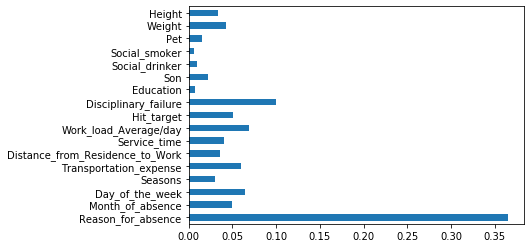

In [185]:
rf(100, X_train, X_test, y_train, y_test)

In [186]:
knnc(5, X_train, X_test, y_train, y_test)


KNNeighbors :

MSE of data:  1.6891891891891893
RMSE of data:  1.299688112275091

Other Parameters:
R² :  -3.2431192660550456
MAE: 1.0675675675675675

Confusion Matrix
 [[ 5  2  0]
 [25 13  0]
 [23  6  0]]
Accuracy Score 24.324324324324326
0.6980551786521936
{'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [189]:
svmc('rbf', X_train, X_test, y_train, y_test)

SVM : rbf 

MSE of data:  0.8918918918918919
RMSE of data:  0.944400281603035

Other Parameters:
R² :  -1.240366972477064
MAE: 0.7027027027027027

Confusion Matrix
 [[ 0  0  7]
 [ 0  0 38]
 [ 0  0 29]]
Accuracy Score 39.189189189189186


In [190]:
nb(X_train, X_test, y_train, y_test)


Naive Bayes :

MSE of data:  0.8918918918918919
RMSE of data:  0.944400281603035

Other Parameters:
R² :  -1.240366972477064
MAE: 0.7027027027027027

Confusion Matrix
 [[ 0  0  7]
 [ 0  0 38]
 [ 0  0 29]]
Accuracy Score 39.189189189189186


In [24]:
# Regression models to predict the Absence hours

In [200]:
# KNeighborsRegressor

def knr(neighbors, X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=neighbors)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nKNN Regressor :\n')
    model_eval(y_test, y_predict)

In [201]:
# Decision Tree Regessor

def dtr(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeRegressor()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nDecision Tree Regressor :\n')
    model_eval(y_test, y_predict)

In [202]:
# Random Forest Regressor

def rfr(n, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators = n, random_state = 1234)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nRandom Forest Regressor:\n')
    model_eval(y_test, y_predict)

In [203]:
# Linear Regression

def lin(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nLinear Regression :\n')
    model_eval(y_test, y_predict)

In [204]:
knr(5, X_train, X_test, y_train, y_test)


KNN Regressor :

MSE of data:  0.32918918918918927
RMSE of data:  0.5737501104045116

Other Parameters:
R² :  0.1731009174311925
MAE: 0.4297297297297297


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [205]:
dtr(X_train, X_test, y_train, y_test)


Decision Tree Regressor :

MSE of data:  0.32432432432432434
RMSE of data:  0.5694947974514994

Other Parameters:
R² :  0.18532110091743115
MAE: 0.2972972972972973

Confusion Matrix
 [[ 4  2  1]
 [ 0 28 10]
 [ 0  8 21]]
Accuracy Score 71.62162162162163


In [208]:
rfr(100, X_train, X_test, y_train, y_test)


Random Forest Regressor:

MSE of data:  0.18281822363179506
RMSE of data:  0.4275724776360086

Other Parameters:
R² :  0.5407740400882066
MAE: 0.31250321750321747


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [209]:
lin(X_train, X_test, y_train, y_test)


Linear Regression :

MSE of data:  0.36099817240213683
RMSE of data:  0.6008312345427265

Other Parameters:
R² :  0.09319908620454076
MAE: 0.43741558650743984


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets